In [1]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

from data.default_dataset import DefaultDataset
from models.faster_vqa import FasterVQA

加载模型和权重

In [2]:
weight_path = '/home/ly/code/LinVQATools/faster_vqa/change_fc_loss/best_SROCC_epoch_105.pth'
weight = torch.load(weight_path)['state_dict']
model_dict = dict(backbone_size='swin_tiny_grpb',
    backbone={"fragments": dict(window_size=(4, 4, 4))},
    backbone_preserve_keys='fragments')
model = FasterVQA(**model_dict)
model.load_state_dict(weight)
print(model)

swin_tiny_grpb


/home/ly/anaconda3/envs/torch1.13/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


None False
Setting backbone: fragments_backbone
FasterVQA(
  (data_preprocessor): BaseDataPreprocessor()
  (model): DiViDeAddEvaluator(
    (fragments_backbone): SwinTransformer3D(
      (patch_embed): PatchEmbed3D(
        (proj): Conv3d(3, 96, kernel_size=(2, 4, 4), stride=(2, 4, 4))
        (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): BasicLayer(
          (blocks): ModuleList(
            (0): SwinTransformerBlock3D(
              (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention3D(
                (qkv): Linear(in_features=96, out_features=288, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=96, out_features=96, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (dro

加载验证集

In [3]:
dataset_dict = dict(anno_reader='ODVVQAReader',
        prefix='temp/fragment',
        phase='test',
        split_file='/home/ly/code/LinVQATools/data/odv_vqa/tr_te_VQA_ODV.txt',
        frame_sampler=dict(
            name='FragmentSampleFrames',
            fsize_t=32 // 8,
            fragments_t=8,
            clip_len=32,
            frame_interval=2,
            t_frag=8,
            num_clips=1,
        ),
        spatial_sampler=dict(
            name='PlaneSpatialFragmentSampler',
            fragments_h=7,
            fragments_w=7,
            fsize_h=32,
            fsize_w=32,
            aligned=8,
        ))
dataset = DefaultDataset(**dataset_dict)
dataloader = DataLoader(dataset=dataset,batch_size=1,num_workers=4,shuffle=False)

07/10 21:40:20 - mmengine - WARNING - anno_root参数未找到，默认为/home/ly/code/LinVQATools/data/odv_vqa


In [4]:
y = []
y_pred = []
model = model.cuda()
for item in tqdm(dataloader):
    inputs = item['inputs'].cuda()
    result = model(inputs,gt_label=item['gt_label'],mode='predict')
    y_pred.append(result[0])
    y.append(result[1])

  0%|          | 0/108 [00:00<?, ?it/s]

07/10 21:40:23 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_ERP_3840x2160_fps23.976_qp27_12306k.mp4
07/10 21:40:23 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_ERP_3840x2160_fps23.976_qp37_3596k.mp4
07/10 21:40:23 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_RCMP_3840x2160_fps23.976_qp27_9939k_ERP.mp4
07/10 21:40:23 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_ERP_3840x2160_fps23.976_qp42_1855k.mp4
07/10 21:40:36 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_TSP_3840x2160_fps23.976_qp37_3252k_ERP.mp4
07/10 21:40:37 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_TSP_3840x2160_fps23.976_qp27_10985k_ERP.mp4
07/10 21:40:38 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_RCMP_3840x2160_fps23.976_qp42_1484k_ERP.mp4
07/10 21:40:42 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_RCMP_3840x2160_fps23.976_qp37_2889k_ERP.mp4
8 7 7


/home/ly/anaconda3/envs/torch1.13/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
  3%|▎         | 3/108 [00:26<12:00,  6.86s/it]

07/10 21:40:49 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_ERP_6144x3072_fps29.97_qp42_880k.mp4
07/10 21:40:50 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_ERP_6144x3072_fps29.97_qp27_9229k.mp4


  4%|▎         | 4/108 [00:27<08:22,  4.83s/it]

07/10 21:40:50 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_ERP_6144x3072_fps29.97_qp37_2048k.mp4
07/10 21:40:52 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1BikingToWork_TSP_3840x2160_fps23.976_qp42_1680k_ERP.mp4


  7%|▋         | 8/108 [00:31<03:05,  1.86s/it]

07/10 21:41:04 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_RCMP_6144x3072_fps29.97_qp27_8296k_ERP.mp4


  8%|▊         | 9/108 [00:40<06:41,  4.05s/it]

07/10 21:41:06 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_TSP_6144x3072_fps29.97_qp27_7639k_ERP.mp4
07/10 21:41:09 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_RCMP_6144x3072_fps29.97_qp42_838k_ERP.mp4
07/10 21:41:11 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_RCMP_6144x3072_fps29.97_qp37_1961k_ERP.mp4


 11%|█         | 12/108 [00:50<04:43,  2.95s/it]

07/10 21:41:22 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_ERP_3840x1920_fps25_qp37_4153k.mp4
07/10 21:41:23 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_TSP_6144x3072_fps29.97_qp37_1588k_ERP.mp4


 12%|█▏        | 13/108 [01:00<08:13,  5.19s/it]

07/10 21:41:24 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_ERP_3840x1920_fps25_qp27_19131k.mp4
07/10 21:41:25 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group1/G1LandSalt_TSP_6144x3072_fps29.97_qp42_715k_ERP.mp4


 15%|█▍        | 16/108 [01:03<03:50,  2.51s/it]

07/10 21:41:31 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_RCMP_3840x1920_fps25_qp42_1350k_ERP.mp4
07/10 21:41:40 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_ERP_3840x1920_fps25_qp42_1608k.mp4


 16%|█▌        | 17/108 [01:17<08:41,  5.73s/it]

07/10 21:41:40 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_RCMP_3840x1920_fps25_qp37_3521k_ERP.mp4
07/10 21:41:42 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_RCMP_3840x1920_fps25_qp27_15973k_ERP.mp4


 18%|█▊        | 19/108 [01:19<05:05,  3.43s/it]

07/10 21:41:43 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_ERP_3840x2160_fps29.97_qp27_12839k.mp4


 19%|█▊        | 20/108 [01:20<03:56,  2.69s/it]

07/10 21:41:48 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_TSP_3840x1920_fps25_qp42_2098k_ERP.mp4
07/10 21:41:48 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_TSP_3840x1920_fps25_qp27_20563k_ERP.mp4


 19%|█▉        | 21/108 [01:25<04:43,  3.25s/it]

07/10 21:41:51 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3BackcountrySkiing_TSP_3840x1920_fps25_qp37_5199k_ERP.mp4


 22%|██▏       | 24/108 [01:29<02:43,  1.94s/it]

07/10 21:41:56 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_RCMP_3840x2160_fps29.97_qp27_7602k_ERP.mp4
07/10 21:41:56 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_ERP_3840x2160_fps29.97_qp37_3009k.mp4


 23%|██▎       | 25/108 [01:33<03:26,  2.49s/it]

07/10 21:41:58 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_ERP_3840x2160_fps29.97_qp42_1324k.mp4


 25%|██▌       | 27/108 [01:36<02:31,  1.87s/it]

07/10 21:42:02 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_RCMP_3840x2160_fps29.97_qp37_1407k_ERP.mp4


 26%|██▌       | 28/108 [01:39<02:53,  2.17s/it]

07/10 21:42:07 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_TSP_3840x2160_fps29.97_qp37_1567k_ERP.mp4
07/10 21:42:10 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_RCMP_3840x2160_fps29.97_qp42_578k_ERP.mp4


 27%|██▋       | 29/108 [01:46<04:57,  3.77s/it]

07/10 21:42:10 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_TSP_3840x2160_fps29.97_qp27_7679k_ERP.mp4


 29%|██▊       | 31/108 [01:48<02:52,  2.24s/it]

07/10 21:42:13 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group3/G3SkyrimHelgen_TSP_3840x2160_fps29.97_qp42_674k_ERP.mp4


 30%|██▉       | 32/108 [01:50<02:46,  2.19s/it]

07/10 21:42:19 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_ERP_5600x2800_fps29.97_qp42_9360k.mp4
07/10 21:42:20 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_ERP_5600x2800_fps29.97_qp27_59876k.mp4


 31%|███       | 33/108 [01:57<04:30,  3.60s/it]

07/10 21:42:21 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_ERP_5600x2800_fps29.97_qp37_19310k.mp4


 32%|███▏      | 35/108 [01:59<02:47,  2.29s/it]

07/10 21:42:24 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_RCMP_5600x2800_fps29.97_qp27_51282k_ERP.mp4


 33%|███▎      | 36/108 [02:00<02:24,  2.01s/it]

07/10 21:42:40 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_TSP_5600x2800_fps29.97_qp27_49345k_ERP.mp4
07/10 21:42:43 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_TSP_5600x2800_fps29.97_qp37_14570k_ERP.mp4
07/10 21:42:47 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_RCMP_5600x2800_fps29.97_qp42_6523k_ERP.mp4
07/10 21:42:54 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_RCMP_5600x2800_fps29.97_qp37_14076k_ERP.mp4


 37%|███▋      | 40/108 [02:33<04:42,  4.16s/it]

07/10 21:42:59 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_ERP_3840x2160_fps29.97_qp37_4266k.mp4
07/10 21:43:03 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_ERP_3840x2160_fps29.97_qp42_2186k.mp4
07/10 21:43:09 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_ERP_3840x2160_fps29.97_qp27_15115k.mp4
07/10 21:43:15 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4BikingInSaalbach_TSP_5600x2800_fps29.97_qp42_7056k_ERP.mp4


 39%|███▉      | 42/108 [02:52<06:40,  6.07s/it]

07/10 21:43:16 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_RCMP_3840x2160_fps29.97_qp42_2077k_ERP.mp4


 41%|████      | 44/108 [02:54<03:39,  3.43s/it]

07/10 21:43:18 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_TSP_3840x2160_fps29.97_qp27_18647k_ERP.mp4
07/10 21:43:31 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_RCMP_3840x2160_fps29.97_qp37_4116k_ERP.mp4
07/10 21:43:34 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_RCMP_3840x2160_fps29.97_qp27_16373k_ERP.mp4


 43%|████▎     | 46/108 [03:12<05:42,  5.52s/it]

07/10 21:43:35 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_ERP_3840x2048_fps29.97_qp27_12696k.mp4


 44%|████▎     | 47/108 [03:13<04:13,  4.15s/it]

07/10 21:43:36 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_ERP_3840x2048_fps29.97_qp37_3545k.mp4


 44%|████▍     | 48/108 [03:13<03:08,  3.14s/it]

07/10 21:43:43 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_TSP_3840x2160_fps29.97_qp42_2695k_ERP.mp4
07/10 21:43:47 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4DrewBrees_TSP_3840x2160_fps29.97_qp37_5244k_ERP.mp4


 48%|████▊     | 52/108 [03:26<02:09,  2.32s/it]

07/10 21:43:50 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_RCMP_3840x2048_fps29.97_qp42_1341k_ERP.mp4
07/10 21:43:55 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_RCMP_3840x2048_fps29.97_qp37_2600k_ERP.mp4
07/10 21:43:56 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_RCMP_3840x2048_fps29.97_qp27_10195k_ERP.mp4
07/10 21:43:59 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_ERP_3840x2048_fps29.97_qp42_1877k.mp4


 51%|█████     | 55/108 [03:37<02:20,  2.64s/it]

07/10 21:44:01 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_ERP_3840x1920_fps29.97_qp27_19898k.mp4


 52%|█████▏    | 56/108 [03:38<01:48,  2.08s/it]

07/10 21:44:06 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_TSP_3840x2048_fps29.97_qp42_1226k_ERP.mp4
07/10 21:44:06 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_TSP_3840x2048_fps29.97_qp37_2378k_ERP.mp4
07/10 21:44:10 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group4/G4WingsuitFlight_TSP_3840x2048_fps29.97_qp27_9198k_ERP.mp4


 56%|█████▌    | 60/108 [03:49<01:30,  1.89s/it]

07/10 21:44:14 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_RCMP_3840x1920_fps29.97_qp37_3568k_ERP.mp4
07/10 21:44:15 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_RCMP_3840x1920_fps29.97_qp27_19645k_ERP.mp4
07/10 21:44:16 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_ERP_3840x1920_fps29.97_qp42_1484k.mp4
07/10 21:44:20 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_ERP_3840x1920_fps29.97_qp37_3644k.mp4


 57%|█████▋    | 62/108 [03:58<02:14,  2.93s/it]

07/10 21:44:22 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_TSP_3840x1920_fps29.97_qp37_4476k_ERP.mp4


 58%|█████▊    | 63/108 [03:59<01:45,  2.35s/it]

07/10 21:44:22 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_TSP_3840x1920_fps29.97_qp42_1840k_ERP.mp4
07/10 21:44:23 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_TSP_3840x1920_fps29.97_qp27_21576k_ERP.mp4


 59%|█████▉    | 64/108 [04:00<01:22,  1.87s/it]

07/10 21:44:28 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group5/G5ResistMarch_RCMP_3840x1920_fps29.97_qp42_1492k_ERP.mp4


 61%|██████    | 66/108 [04:05<01:31,  2.18s/it]

07/10 21:44:29 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_ERP_7680x3840_fps29.97_qp42_1663k.mp4


 62%|██████▏   | 67/108 [04:06<01:13,  1.78s/it]

07/10 21:44:30 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_RCMP_7680x3840_fps29.97_qp27_38041k_ERP.mp4
07/10 21:44:30 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_ERP_7680x3840_fps29.97_qp37_5981k.mp4


 63%|██████▎   | 68/108 [04:07<01:00,  1.51s/it]

07/10 21:44:36 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_ERP_7680x3840_fps29.97_qp27_54581k.mp4


 67%|██████▋   | 72/108 [04:15<00:54,  1.52s/it]

07/10 21:44:56 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_TSP_7680x3840_fps29.97_qp27_29114k_ERP.mp4
07/10 21:45:01 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_TSP_7680x3840_fps29.97_qp37_3561k_ERP.mp4
07/10 21:45:03 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_RCMP_7680x3840_fps29.97_qp42_1306k_ERP.mp4
07/10 21:45:20 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_RCMP_7680x3840_fps29.97_qp37_3582k_ERP.mp4


 70%|███████   | 76/108 [04:59<02:44,  5.15s/it]

07/10 21:45:24 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_ERP_4096x2048_fps30_qp37_1038k.mp4
07/10 21:45:30 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_ERP_4096x2048_fps30_qp42_509k.mp4
07/10 21:45:32 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_ERP_4096x2048_fps30_qp27_4909k.mp4
07/10 21:45:41 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group6/G6AngelFallsClimbing_TSP_7680x3840_fps29.97_qp42_1480k_ERP.mp4


 71%|███████▏  | 77/108 [05:17<04:41,  9.09s/it]

07/10 21:45:41 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_RCMP_4096x2048_fps30_qp37_980k_ERP.mp4


 72%|███████▏  | 78/108 [05:18<03:20,  6.67s/it]

07/10 21:45:42 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_RCMP_4096x2048_fps30_qp42_485k_ERP.mp4


 73%|███████▎  | 79/108 [05:19<02:22,  4.93s/it]

07/10 21:45:43 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_TSP_4096x2048_fps30_qp27_5525k_ERP.mp4


 74%|███████▍  | 80/108 [05:20<01:43,  3.71s/it]

07/10 21:45:59 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_RCMP_4096x2048_fps30_qp27_4286k_ERP.mp4


 75%|███████▌  | 81/108 [05:36<03:18,  7.33s/it]

07/10 21:45:59 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_TSP_4096x2048_fps30_qp42_635k_ERP.mp4


 76%|███████▌  | 82/108 [05:37<02:20,  5.40s/it]

07/10 21:46:00 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_ERP_4096x2048_fps30_qp27_4387k.mp4


 77%|███████▋  | 83/108 [05:38<01:41,  4.07s/it]

07/10 21:46:01 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_ERP_4096x2048_fps30_qp37_880k.mp4


 78%|███████▊  | 84/108 [05:38<01:14,  3.10s/it]

07/10 21:46:06 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7PressConference_TSP_4096x2048_fps30_qp37_1238k_ERP.mp4


 80%|███████▉  | 86/108 [05:43<00:58,  2.66s/it]

07/10 21:46:08 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_RCMP_4096x2048_fps30_qp27_3965k_ERP.mp4


 81%|████████▏ | 88/108 [05:45<00:34,  1.75s/it]

07/10 21:46:10 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_RCMP_4096x2048_fps30_qp42_353k_ERP.mp4
07/10 21:46:10 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_RCMP_4096x2048_fps30_qp37_961k_ERP.mp4
07/10 21:46:13 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_ERP_4096x2048_fps30_qp42_294k.mp4


 85%|████████▌ | 92/108 [05:52<00:22,  1.43s/it]

07/10 21:46:16 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_TSP_4096x2048_fps30_qp37_1963k_ERP.mp4
07/10 21:46:17 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_ERP_7680x3840_fps29.97_qp27_12254k.mp4
07/10 21:46:18 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_TSP_4096x2048_fps30_qp42_906k_ERP.mp4
07/10 21:46:20 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group7/G7Shooting_TSP_4096x2048_fps30_qp27_7770k_ERP.mp4


 89%|████████▉ | 96/108 [05:59<00:16,  1.37s/it]

07/10 21:46:25 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_ERP_7680x3840_fps29.97_qp42_1044k.mp4
07/10 21:46:27 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_RCMP_7680x3840_fps29.97_qp27_11238k_ERP.mp4
07/10 21:46:28 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_ERP_7680x3840_fps29.97_qp37_1499k.mp4


 92%|█████████▏| 99/108 [06:06<00:15,  1.69s/it]

07/10 21:47:04 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_TSP_7680x3840_fps29.97_qp27_16522k_ERP.mp4
07/10 21:47:04 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_RCMP_7680x3840_fps29.97_qp42_901k_ERP.mp4
07/10 21:47:06 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_RCMP_7680x3840_fps29.97_qp37_1390k_ERP.mp4


 94%|█████████▍| 102/108 [06:44<00:38,  6.34s/it]

07/10 21:47:16 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_TSP_7680x3840_fps29.97_qp37_2799k_ERP.mp4


 95%|█████████▌| 103/108 [06:52<00:34,  6.99s/it]

07/10 21:47:43 - mmengine - INFO - 加载未处理的/data/ly/VQA_ODV/Group10/G10PandaBaseChengdu_TSP_7680x3840_fps29.97_qp42_1196k_ERP.mp4


100%|██████████| 108/108 [07:39<00:00,  4.26s/it]


In [5]:
from scipy.stats import spearmanr

y_pred = torch.stack(y_pred,dim=0).flatten().cpu().detach().numpy()
y = torch.stack(y,dim=0).flatten().numpy()
s = spearmanr(y, y_pred)[0]
print(s)

-0.8675583754894395


In [6]:
print(y)
print(y_pred)
print(y-y_pred)

[0.51132804 0.5121804  0.3778674  0.5966643  0.52622783 0.38351288
 0.5757952  0.55957365 0.4351227  0.6646226  0.5567569  0.29488623
 0.6628805  0.522985   0.25827035 0.62213933 0.5569207  0.32290414
 0.5357787  0.47965592 0.32013595 0.5746439  0.46648276 0.3666844
 0.5680887  0.5283015  0.47307777 0.57668144 0.49099138 0.3588439
 0.5733949  0.45492408 0.28146625 0.5985142  0.46595427 0.2991815
 0.56138104 0.50505793 0.44462454 0.53615963 0.44455922 0.44559354
 0.56366974 0.4463708  0.48651758 0.58086497 0.5357705  0.4452538
 0.61498195 0.5618573  0.4033826  0.5898661  0.61411136 0.50728554
 0.5738605  0.59103864 0.4383474  0.573973   0.51360047 0.44698453
 0.62682134 0.5736339  0.46532336 0.6036083  0.48774067 0.35964543
 0.61667264 0.4382963  0.26264408 0.62269986 0.5554357  0.4467364
 0.63419855 0.5647622  0.30006748 0.6116221  0.5409302  0.20384605
 0.646545   0.5678368  0.24719436 0.55914426 0.40730527 0.2633503
 0.60309356 0.388904   0.26027983 0.62979597 0.4799649  0.3261121
 0

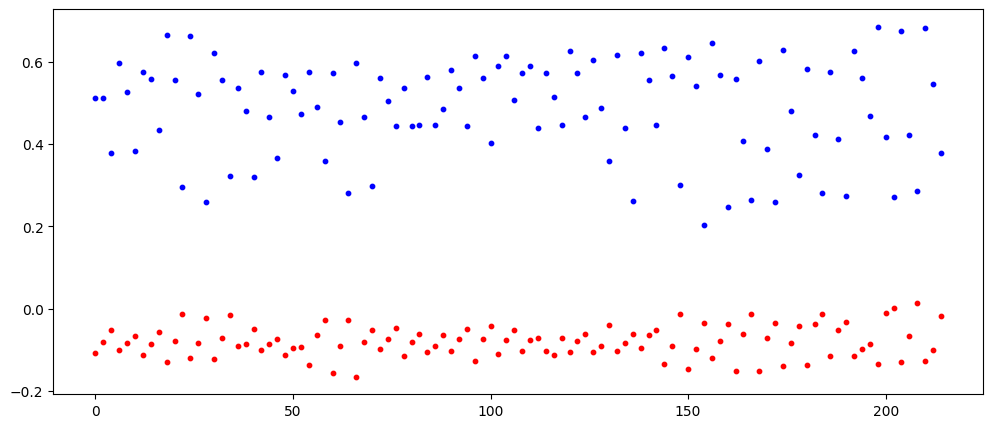

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
plt.scatter(x=[i for i in range(0,2*len(y),2)],y=y,c='b',s=10)
plt.scatter(x=[i for i in range(0,2*len(y_pred),2)],y=y_pred,c='r',s=10)